In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from skimage import io

In [6]:
df = pd.read_csv('transactions_train.csv', chunksize=1000000)
articles = pd.read_csv('articles.csv')
users = next(df)
df = users.merge(articles, on='article_id')

In [7]:
#number of unique values in each property
df.nunique().sort_values(ascending=True).to_frame().T

,sales_channel_id,index_group_name,index_group_no,perceived_colour_value_id,perceived_colour_value_name,index_name,index_code,product_group_name,perceived_colour_master_name,perceived_colour_master_id,...,product_type_name,product_type_no,department_name,department_no,price,detail_desc,product_code,prod_name,article_id,customer_id
0,2,5,5,8,8,10,10,15,19,19,...,101,102,228,275,2909,14016,15081,15223,29133,214936


In [8]:
#Choose features to build feature space
features = ['product_group_name', 'colour_group_name', 'section_name', 'department_name', 'graphical_appearance_name']

df1 = df[['customer_id', 'article_id'] + features]
dummies_df = pd.get_dummies(df1, columns=features)
dummies_df.head()

,customer_id,article_id,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Interior textile,product_group_name_Items,...,graphical_appearance_name_Other pattern,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Sequin,graphical_appearance_name_Slub,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent,graphical_appearance_name_Treatment,graphical_appearance_name_Unknown
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
minimum_items = 2
groupby_customer = dummies_df.groupby('customer_id')

l = []
cutomer_ids = []
article_ids = []
for key in groupby_customer.groups.keys():
    temp = groupby_customer.get_group(key)
    if temp.article_id.nunique() >= minimum_items:
        l.append(temp.drop('article_id', axis=1).sum(numeric_only=True).values)
        cutomer_ids.append(key)
        article_ids.extend(temp.article_id.values.tolist())

In [10]:
user_feature = pd.DataFrame(l, columns = dummies_df.columns[2:])
normalized_user_feature = user_feature.div(user_feature.sum(axis=1), axis=0)
normalized_user_feature.insert(0, 'customer_id', cutomer_ids)
normalized_user_feature = normalized_user_feature.set_index('customer_id')
normalized_user_feature


,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Interior textile,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,...,graphical_appearance_name_Other pattern,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Sequin,graphical_appearance_name_Slub,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent,graphical_appearance_name_Treatment,graphical_appearance_name_Unknown
customer_id,,,,,,,,,,,,,,,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.000000,0.0,0.0,0.050,0.025000,0.125000,0.0,0.0,0.000000,0.000000,...,0.000,0.0,0.000000,0.0,0.0,0.125000,0.000000,0.0,0.000,0.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000,0.0,0.000000,0.0,0.0,0.200000,0.000000,0.0,0.000,0.0
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.026087,0.0,0.0,0.000,0.000000,0.043478,0.0,0.0,0.008696,0.069565,...,0.000,0.0,0.008696,0.0,0.0,0.130435,0.000000,0.0,0.000,0.0
00009d946eec3ea54add5ba56d5210ea898def4b46c68570cf0096d962cacc75,0.000000,0.0,0.0,0.000,0.066667,0.133333,0.0,0.0,0.000000,0.000000,...,0.000,0.0,0.000000,0.0,0.0,0.033333,0.033333,0.0,0.000,0.0
0000f2ea26b7f0a9175f428c8cf7743e9e10e193465ecdfa486d5f3bf019d330,0.000000,0.0,0.0,0.000,0.200000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffbe76d05cba1b9bdf14bf67e58e7b73d4c2e3418f13cef418a01a6d37946e5,0.000000,0.0,0.0,0.000,0.000000,0.200000,0.0,0.0,0.000000,0.000000,...,0.000,0.0,0.000000,0.0,0.0,0.200000,0.000000,0.0,0.000,0.0
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01,0.000000,0.0,0.0,0.000,0.160000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000,0.0,0.000000,0.0,0.0,0.040000,0.000000,0.0,0.000,0.0
fffe7116f9f68e8ad287fd7b6e33aad4871d7080e77d2d5e52636ba1c27cf032,0.000000,0.0,0.0,0.025,0.100000,0.075000,0.0,0.0,0.000000,0.000000,...,0.025,0.0,0.000000,0.0,0.0,0.125000,0.000000,0.0,0.025,0.0


In [11]:
item_feature = dummies_df.drop_duplicates(subset='article_id')
item_feature = item_feature[item_feature.article_id.isin(article_ids)].drop('customer_id', axis=1)
item_feature = item_feature.set_index('article_id')
item_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Interior textile,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,...,graphical_appearance_name_Other pattern,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Sequin,graphical_appearance_name_Slub,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent,graphical_appearance_name_Treatment,graphical_appearance_name_Unknown
article_id,,,,,,,,,,,,,,,,,,,,,
663713001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
541518023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
505221004,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685687003,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685687004,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674515001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
651901001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
543760005,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
scores = normalized_user_feature.dot(item_feature.T)
scores

article_id,663713001,541518023,505221004,685687003,685687004,685687001,505221001,688873012,501323011,598859003,...,451774002,537034002,587704001,711174001,624940002,674515001,651901001,543760005,570325002,539008001
customer_id,,,,,,,,,,,,,,,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.200000,0.125000,0.150000,0.225000,0.225000,0.225000,0.150000,0.175000,0.250000,0.175000,...,0.125000,0.125000,0.000000,0.250000,0.225000,0.125000,0.125000,0.325000,0.225000,0.000000
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.866667,0.733333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.200000,...,0.200000,0.133333,0.000000,0.200000,0.000000,0.200000,0.200000,0.200000,0.000000,0.000000
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.278261,0.269565,0.156522,0.173913,0.156522,0.156522,0.139130,0.052174,0.182609,0.130435,...,0.182609,0.060870,0.069565,0.182609,0.043478,0.156522,0.156522,0.130435,0.069565,0.008696
00009d946eec3ea54add5ba56d5210ea898def4b46c68570cf0096d962cacc75,0.066667,0.033333,0.133333,0.233333,0.233333,0.233333,0.133333,0.200000,0.233333,0.200000,...,0.033333,0.033333,0.000000,0.166667,0.166667,0.033333,0.033333,0.033333,0.266667,0.000000
0000f2ea26b7f0a9175f428c8cf7743e9e10e193465ecdfa486d5f3bf019d330,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.000000,0.133333,0.400000,0.400000,...,0.000000,0.133333,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.200000,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffbe76d05cba1b9bdf14bf67e58e7b73d4c2e3418f13cef418a01a6d37946e5,0.200000,0.300000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.000000,0.000000,0.400000,0.200000,0.200000,0.200000,0.300000,0.200000,0.000000
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01,0.120000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,0.200000,...,0.040000,0.080000,0.000000,0.040000,0.000000,0.040000,0.040000,0.040000,0.000000,0.000000
fffe7116f9f68e8ad287fd7b6e33aad4871d7080e77d2d5e52636ba1c27cf032,0.225000,0.125000,0.075000,0.125000,0.125000,0.125000,0.075000,0.100000,0.425000,0.325000,...,0.125000,0.125000,0.000000,0.200000,0.100000,0.125000,0.125000,0.175000,0.150000,0.000000


In [13]:
def get_rcmnd(customer_id):
    cutomer_scores = scores.loc[customer_id]
    customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
    prev_dropped = cutomer_scores.drop(customer_prev_items.values)
    ordered = prev_dropped.sort_values(ascending=False)   
    return ordered, customer_prev_items

In [24]:
#show recommendation for a specific customer
k = 6 # number of articles to recommend
customer_id = scores.index[576] # enter the index number of the custormer id
rcmnds, prev_items = get_rcmnd(customer_id)
rcmnds = rcmnds.index.values[:k]
path = "/Users/sanchitgarg/Documents/h-and-m-personalized-fashion-recommendations/images"


In [25]:
def plot_prev():
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(prev_items, range(1, len(prev_items)+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, 6, i)
        plt.imshow(image)

In [26]:
def plot_rcmnd():
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(rcmnds, range(1, k+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, 6, i)
        plt.imshow(image)

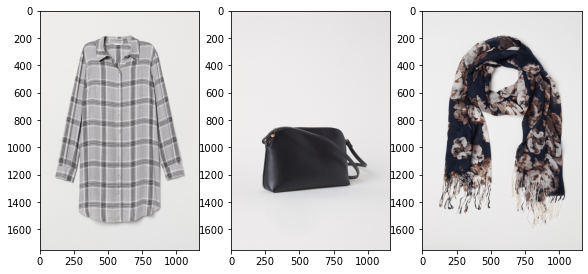

In [27]:
plot_prev()

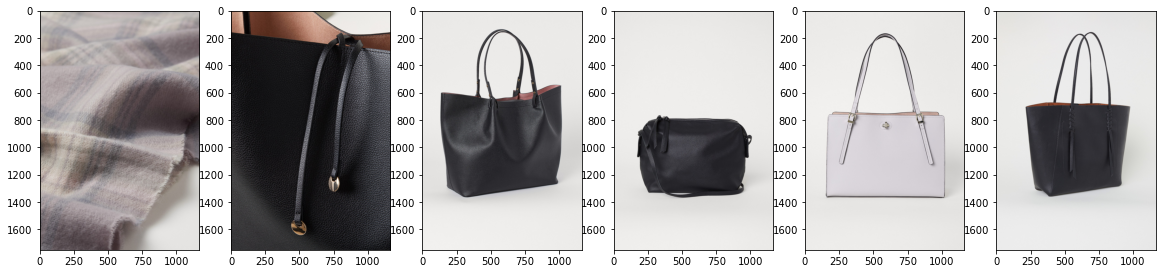

In [28]:
plot_rcmnd()